In [ ]:
# run benchmark
!python auto_website_benchmark.py ./chromium_version.txt ./website.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import copy as cpy
import numpy as np
%matplotlib inline



In [95]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_24_08_2017_13_43_27.pkl"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print(benchmark_data)

{(u'ESPN', u'group_optimized_experiment', 1503544410.151065): object
CSSSelector                        87.730315
ComputedStyle                      51.700787
InvalidationSet                    37.411417
LayoutObject                       50.167323
Node                               96.000000
StyleBackgroundData                 3.885827
StyleBoxData                        9.321850
StyleInheritedData                 25.031496
StylePropertySet                    3.567913
StyleRareInheritedLayer0Data        1.056102
StyleRareNonInheritedLayer0Data    95.848425
StyleSurroundData                  24.004921
StyleVisualData                     1.102362
Name: 1503544437066, dtype: float64, (u'Pinterest', u'group_optimized_experiment', 1503544524.577475): object
CSSSelector                         20.006989
ComputedStyle                      105.770530
InvalidationSet                     40.423995
LayoutObject                       115.492137
Node                                96.000000
StyleB

In [96]:
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

['Website', 'ChromiumVersion', 'TimeStamp', 'Total', 'TotalStyle']
set(['ComputedStyle', 'StyleTransformData', 'StyleFilterOpsData', 'Website', 'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleFlexibleBoxData', 'StyleBoxData', 'Node', 'TimeStamp', 'LayoutObject', 'StyleBackgroundData', 'InvalidationSet', 'StyleWillChangeData', 'StyleInheritedData', 'ChromiumVersion', 'StyleRareNonInheritedLayer0Data', 'TotalStyle', 'StyleMultiColData', 'StyleRareInheritedLayer0Data', 'CSSSelector', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', 'Total', 'StyleVisualData'])


In [97]:
non_style_fields = ['Website', 'ChromiumVersion', 'TimeStamp', 'Total', \
                    'TotalStyle', 'CSSSelector', 'LayoutObject', 'InvalidationSet', \
                    'Node'
                   ]
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i not in non_style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].mean()

    CSSSelector             ChromiumVersion  ComputedStyle  InvalidationSet  \
0     87.730315  group_optimized_experiment      51.700787        37.411417   
1     20.006989  group_optimized_experiment     105.770530        40.423995   
2     63.100819                    original     101.878565       138.008472   
3     20.124194  group_optimized_experiment     105.930873        39.929701   
4     30.641285                    original      69.979209        27.178615   
5     50.717515                    original      20.894044        42.130922   
6      2.285474  group_optimized_experiment      21.759125         2.749132   
7      3.156292  group_optimized_experiment      62.660815         3.127631   
8    110.577599  group_optimized_experiment     121.619287       217.844299   
9     79.222494  group_optimized_experiment      51.926650       124.092910   
10    36.631180                    original      36.523584        46.686115   
11   144.168421                    original      88.

In [53]:
benchmark_dataframe.to_csv("benchmark.csv")

In [22]:
# benchmark_dataframe.groupby(["Website"]).plot.bar(x="ChromiumVersion", y="Total")

-53.6924378331 -34.1906208468
-250.195913841 5.67026710413
Model score:  -0.0128557343374
-58.9635134818


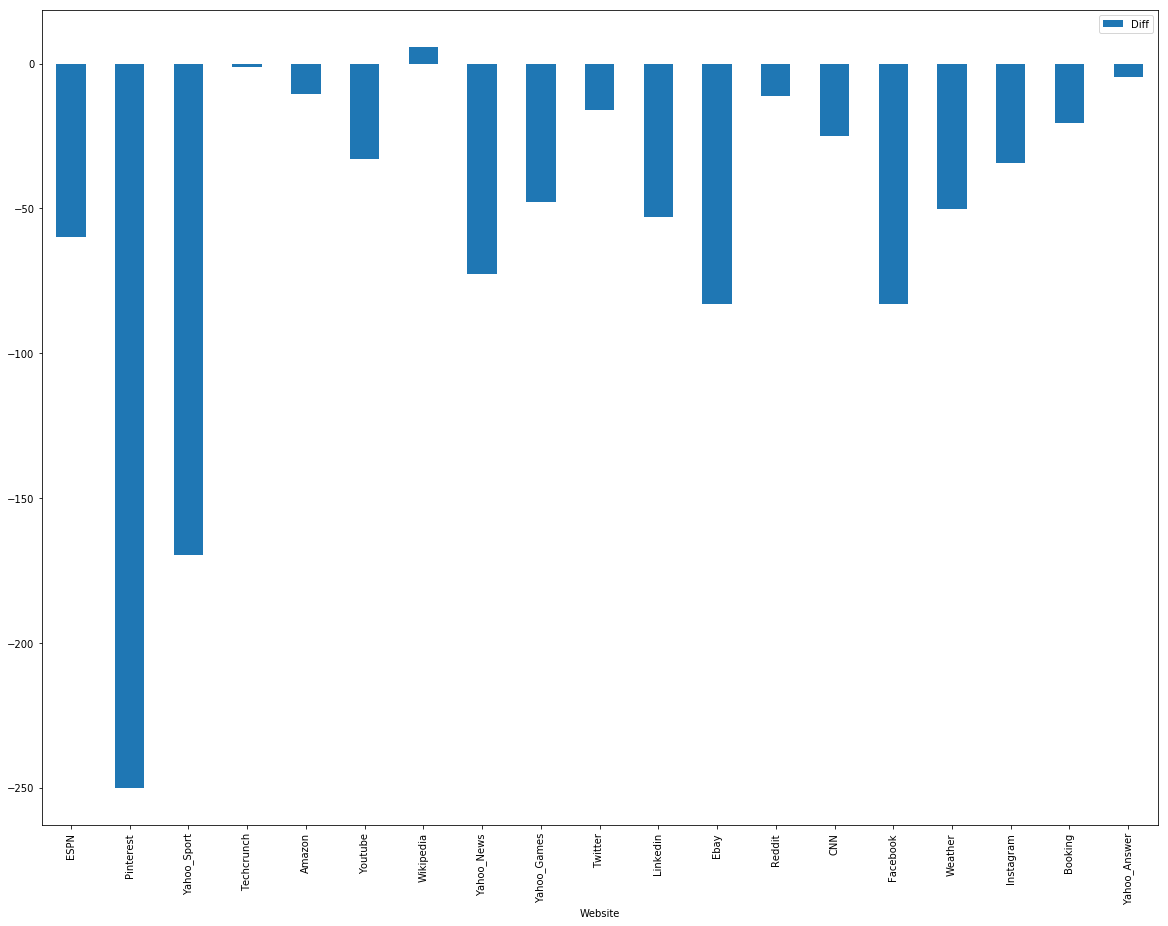

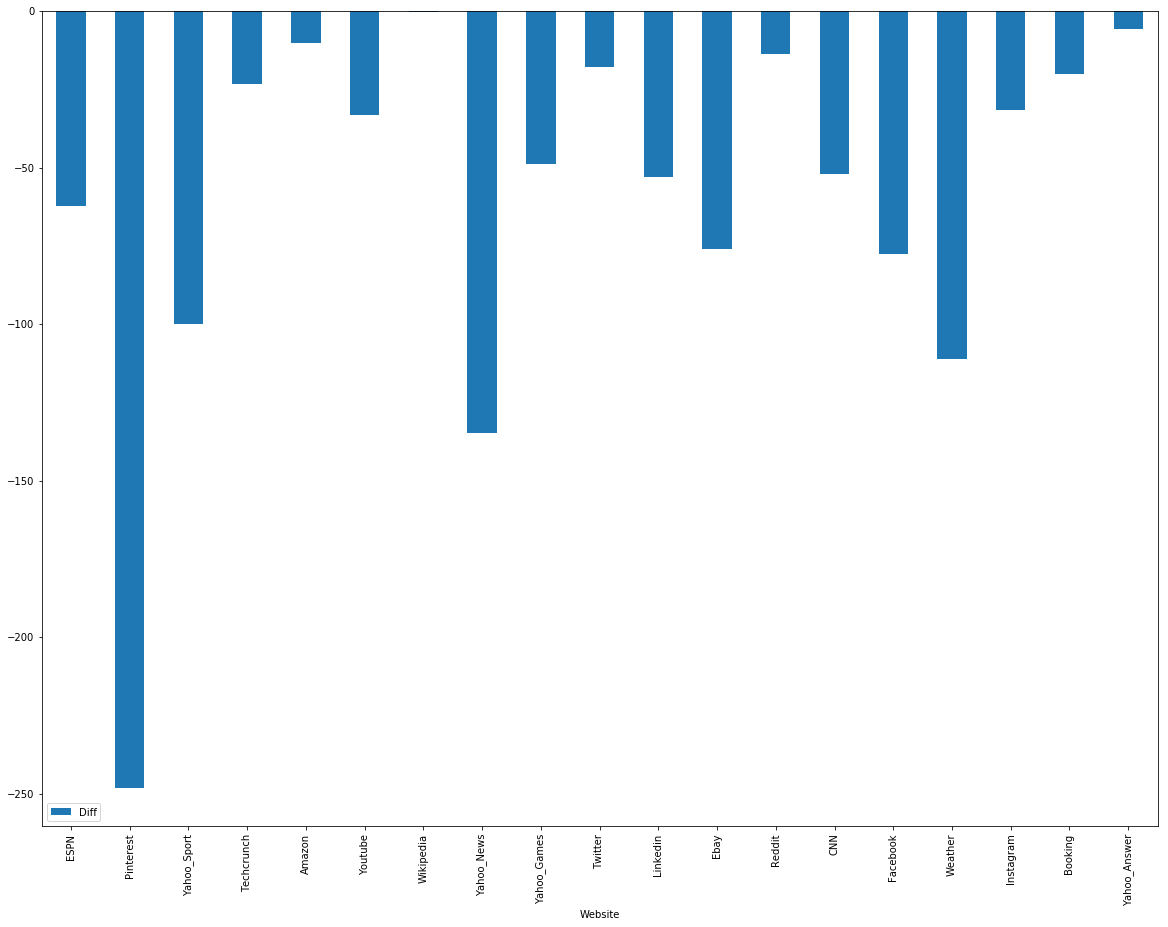

In [98]:
website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].Total.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].Total.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"]), np.median(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))
print min(website_diff_dataframe["Diff"]), max(website_diff_dataframe["Diff"])
print "Model score: ", (np.mean(website_diff_dataframe["Diff"]) 
                        + np.median(website_diff_dataframe["Diff"])
                        + max(website_diff_dataframe["Diff"])
                       ) / (1
                            * (np.linalg.norm(website_diff_dataframe[website_diff_dataframe["Diff"] < 0]["Diff"]) +1)
                            * sum(website_diff_dataframe["Diff"] < 0)
                           )

website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].TotalStyle.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].TotalStyle.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))

In [166]:
np.linalg.norm(website_diff_dataframe[website_diff_dataframe["Diff"] < 0]["Diff"])

0.0

In [17]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_param"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print benchmark_data
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

style_fields = ['ComputedStyle', 'StyleTransformData', 'StyleFilterOpsData', \
                'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleFlexibleBoxData', \
                'StyleBoxData', 'StyleBackgroundData', 'StyleWillChangeData', 'StyleInheritedData', \
                'StyleMultiColData', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', \
                'StyleVisualData']
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i in style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe.iloc[benchmark_dataframe.groupby("Website", as_index=False)["Total"].idxmin()]
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].median()
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].count()

IOError: [Errno 2] No such file or directory: './mini_benchmark_param'